In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# url to fifa data csv
fifa_url = 'https://worldcup.sfg.io/teams/results'

In [2]:
# Import csv *** contains JSONS format in some indeces ***

matches_url = 'https://worldcup.sfg.io/matches'
match_df = pd.DataFrame(requests.get(matches_url).json())
match_df.tail()

,attendance,away_team,away_team_country,away_team_events,away_team_statistics,datetime,fifa_id,home_team,home_team_country,home_team_events,...,last_score_update_at,location,officials,stage_name,status,time,venue,weather,winner,winner_code
59,44287,"{'country': 'Croatia', 'code': 'CRO', 'goals':...",Croatia,"[{'id': 1095, 'type_of_event': 'yellow-card', ...","{'country': 'Croatia', 'attempts_on_goal': 17,...",2018-07-07T18:00:00Z,300331504,"{'country': 'Russia', 'code': 'RUS', 'goals': ...",Russia,"[{'id': 1094, 'type_of_event': 'goal', 'player...",...,2018-07-07T20:51:30Z,Fisht Stadium,"[Sandro RICCI, Emerson DE CARVALHO, Marcelo VA...",Quarter-finals,completed,full-time,Sochi,"{'humidity': '70', 'temp_celsius': '24', 'temp...",Croatia,CRO
60,64286,"{'country': 'Belgium', 'code': 'BEL', 'goals':...",Belgium,"[{'id': 1122, 'type_of_event': 'substitution-o...","{'country': 'Belgium', 'attempts_on_goal': 9, ...",2018-07-10T18:00:00Z,300331531,"{'country': 'France', 'code': 'FRA', 'goals': ...",France,"[{'id': 1121, 'type_of_event': 'goal', 'player...",...,2018-07-10T19:54:35Z,Saint Petersburg Stadium,"[Andres CUNHA, Nicolas TARAN, Mauricio ESPINOS...",Semi-finals,completed,full-time,St. Petersburg,"{'humidity': '75', 'temp_celsius': '18', 'temp...",France,FRA
61,78011,"{'country': 'England', 'code': 'ENG', 'goals':...",England,"[{'id': 1137, 'type_of_event': 'goal', 'player...","{'country': 'England', 'attempts_on_goal': 11,...",2018-07-11T18:00:00Z,300331522,"{'country': 'Croatia', 'code': 'CRO', 'goals':...",Croatia,"[{'id': 1138, 'type_of_event': 'yellow-card', ...",...,2018-07-11T20:37:36Z,Luzhniki Stadium,"[Cuneyt CAKIR, Bahattin DURAN, Tarik ONGUN, Bj...",Semi-finals,completed,full-time,Moscow,"{'humidity': '64', 'temp_celsius': '21', 'temp...",Croatia,CRO
62,64406,"{'country': 'England', 'code': 'ENG', 'goals':...",England,"[{'id': 1163, 'type_of_event': 'substitution-o...","{'country': 'England', 'attempts_on_goal': 15,...",2018-07-14T14:00:00Z,300331536,"{'country': 'Belgium', 'code': 'BEL', 'goals':...",Belgium,"[{'id': 1160, 'type_of_event': 'goal', 'player...",...,2018-07-14T15:52:28Z,Saint Petersburg Stadium,"[Alireza FAGHANI, Reza SOKHANDAN, Mohammadreza...",Play-off for third place,completed,full-time,St. Petersburg,"{'humidity': '45', 'temp_celsius': '26', 'temp...",Belgium,BEL
63,78011,"{'country': 'Croatia', 'code': 'CRO', 'goals':...",Croatia,"[{'id': 1178, 'type_of_event': 'goal-own', 'pl...","{'country': 'Croatia', 'attempts_on_goal': 15,...",2018-07-15T15:00:00Z,300331552,"{'country': 'France', 'code': 'FRA', 'goals': ...",France,"[{'id': 1179, 'type_of_event': 'yellow-card', ...",...,2018-07-15T16:54:32Z,Luzhniki Stadium,"[Nestor PITANA, Hernan MAIDANA, Juan Pablo BEL...",Final,completed,full-time,Moscow,"{'humidity': '51', 'temp_celsius': '27', 'temp...",France,FRA


In [3]:
# toggle to view away_team_statistics indeces json layout

match_df.iloc[0,4]

{'country': 'Saudi Arabia',
 'attempts_on_goal': 6,
 'on_target': 0,
 'off_target': 3,
 'blocked': 3,
 'woodwork': 0,
 'corners': 2,
 'offsides': 1,
 'ball_possession': 60,
 'pass_accuracy': 86,
 'num_passes': 511,
 'passes_completed': 442,
 'distance_covered': 105,
 'balls_recovered': 48,
 'tackles': 16,
 'clearances': 31,
 'yellow_cards': 1,
 'red_cards': 0,
 'fouls_committed': 10,
 'tactics': '4-5-1',
 'starting_eleven': [{'name': 'ABDULLAH ALMUAIOUF',
   'captain': False,
   'shirt_number': 1,
   'position': 'Goalie'},
  {'name': 'OSAMA HAWSAWI',
   'captain': True,
   'shirt_number': 3,
   'position': 'Defender'},
  {'name': 'OMAR HAWSAWI',
   'captain': False,
   'shirt_number': 5,
   'position': 'Defender'},
  {'name': 'MOHAMMED ALBURAYK',
   'captain': False,
   'shirt_number': 6,
   'position': 'Defender'},
  {'name': 'SALMAN ALFARAJ',
   'captain': False,
   'shirt_number': 7,
   'position': 'Midfield'},
  {'name': 'YAHIA ALSHEHRI',
   'captain': False,
   'shirt_number': 8,


In [4]:
statslist = ["passes_completed", "attempts_on_goal","ball_possession", "pass_accuracy",
             "balls_recovered", "distance_covered", "tackles", "fouls_committed"]

# get passes completed for the away team
#set up empty list and append to it
big_df = pd.DataFrame()

for stat in statslist:
    
    completed_passes_a = []

    for s in range(len(match_df["away_team_statistics"])):
        passes = match_df["away_team_statistics"][s][stat]
        completed_passes_a.append(passes)
    #completed_passes_a
    # get passes completed for the home team
    #set up empty list and append to it
    completed_passes_h = []

    for s in range(len(match_df["home_team_statistics"])):
        passes = match_df["home_team_statistics"][s][stat]
        completed_passes_h.append(passes)
    #completed_passes_h
    # build passes completed including country
    # concat both dataframes together to make one long list
    away_df = pd.DataFrame({"Country": match_df["away_team_country"], 
                           f"{stat}": completed_passes_a})
    home_df = pd.DataFrame({"Country": match_df["home_team_country"],
                           f"{stat}": completed_passes_h})
    #    "Country": match_df["away_team_country"],
    #    "Passes Completed": completed_passes_a})

    #passes_completed_df_h = pd.DataFrame({
     #   "Country": match_df["home_team_country"],
      #  "Passes Completed": completed_passes_h})
    #concating the two df together
    concat = away_df.append(home_df, ignore_index=True, verify_integrity=False, sort=None)
    big_df[stat] = concat[stat]
    big_df["Country"] = concat['Country']
    
big_df

,passes_completed,Country,attempts_on_goal,ball_possession,pass_accuracy,balls_recovered,distance_covered,tackles,fouls_committed
0,442,Saudi Arabia,6,60,86,48,105,16,10.0
1,508,Uruguay,14,57,86,54,111,8,6.0
2,129,Iran,8,36,66,38,100,14,14.0
3,677,Spain,12,61,93,28,103,7,10.0
4,332,Australia,4,49,85,49,111,15,19.0
5,127,Iceland,9,28,67,35,105,18,15.0
6,282,Denmark,10,48,82,40,110,11,18.0
7,327,Nigeria,14,46,84,42,101,7,16.0
8,325,Serbia,10,50,83,42,109,7,15.0
9,231,Mexico,12,40,82,38,106,7,15.0


In [5]:
# build passes completed including country
# concat both dataframes together to make one long list

passes_completed_df_a = pd.DataFrame({
    "Country": match_df["away_team_country"],
    "Passes Completed": completed_passes_a})

passes_completed_df_h = pd.DataFrame({
    "Country": match_df["home_team_country"],
    "Passes Completed": completed_passes_h})

#concating the two df together
concat = passes_completed_df_a.append(passes_completed_df_h, ignore_index=True, verify_integrity=False, sort=None)
concat.head()

,Country,Passes Completed
0,Saudi Arabia,10.0
1,Uruguay,6.0
2,Iran,14.0
3,Spain,10.0
4,Australia,19.0


In [6]:
#find total number of games played by each country
num_of_games = big_df["Country"].value_counts()
num_of_games

Belgium           7
Croatia           7
France            7
England           7
Uruguay           5
Russia            5
Brazil            5
Sweden            5
Spain             4
Portugal          4
Mexico            4
Switzerland       4
Japan             4
Colombia          4
Denmark           4
Argentina         4
Iran              3
Tunisia           3
Germany           3
Serbia            3
Panama            3
Iceland           3
Peru              3
Senegal           3
Egypt             3
Australia         3
Korea Republic    3
Poland            3
Saudi Arabia      3
Costa Rica        3
Morocco           3
Nigeria           3
Name: Country, dtype: int64

In [33]:
#groupby 

#sum on the groupby country
groups1 = big_df.groupby("Country", as_index = True).sum()

#rename series title
groups1["Number of Games"] = num_of_games

# took country out of undex and set index back to numerals
groups1.reset_index(inplace = True)

for stat in statslist:
#set up new series with avg shots per game by dividing total shots by number of games
    groups1[f"Avg {stat}"] = round(groups1[stat]/groups1["Number of Games"], 1)
groups=groups1.drop(groups1.index[27])
#groups=groups2.drop(groups2.index[11])

In [34]:
#Getting first goal time of each game for each team 
Goals_df = pd.DataFrame()
first_goal_away = []
for s in range(len(match_df["away_team_events"])):
    events = match_df["away_team_events"][s]
    match_goals=[]
    for event in events:
        if (event['type_of_event'] == 'goal'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time) 
            match_goals.append(time)
        elif(event['type_of_event'] == 'goal-penalty'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time)
            match_goals.append(time)
        else:
            continue
    if(len(match_goals)>0):
        first_goal_away.append(min(match_goals))
    else:
        first_goal_away.append(0)
        
first_goal_home = []
    
for s in range(len(match_df["home_team_events"])):
    events = match_df["home_team_events"][s]
    match_goals=[]
    for event in events:
        if (event['type_of_event'] == 'goal'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time) 
            match_goals.append(time)
        elif(event['type_of_event'] == 'goal-penalty'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time)
            match_goals.append(time)
        else:
            continue
            #print(match_goals)
    if (len(match_goals)>0):
        first_goal_home.append(min(match_goals))
    else:
        first_goal_home.append(0)
        
    
away_df = pd.DataFrame({"Country": match_df["away_team_country"], 
                           "First goals": first_goal_away})
home_df = pd.DataFrame({"Country": match_df["home_team_country"],
                           "First goals": first_goal_home})

concat = away_df.append(home_df, ignore_index=True, verify_integrity=False, sort=None)
Goals_df["First Goals"] = concat["First goals"]
Goals_df["Country"] = concat['Country']

#Goals_df

In [35]:
Goals_df_dropped= Goals_df[Goals_df['First Goals']!=0]
goal_means = Goals_df_dropped.groupby('Country', as_index = False).mean()

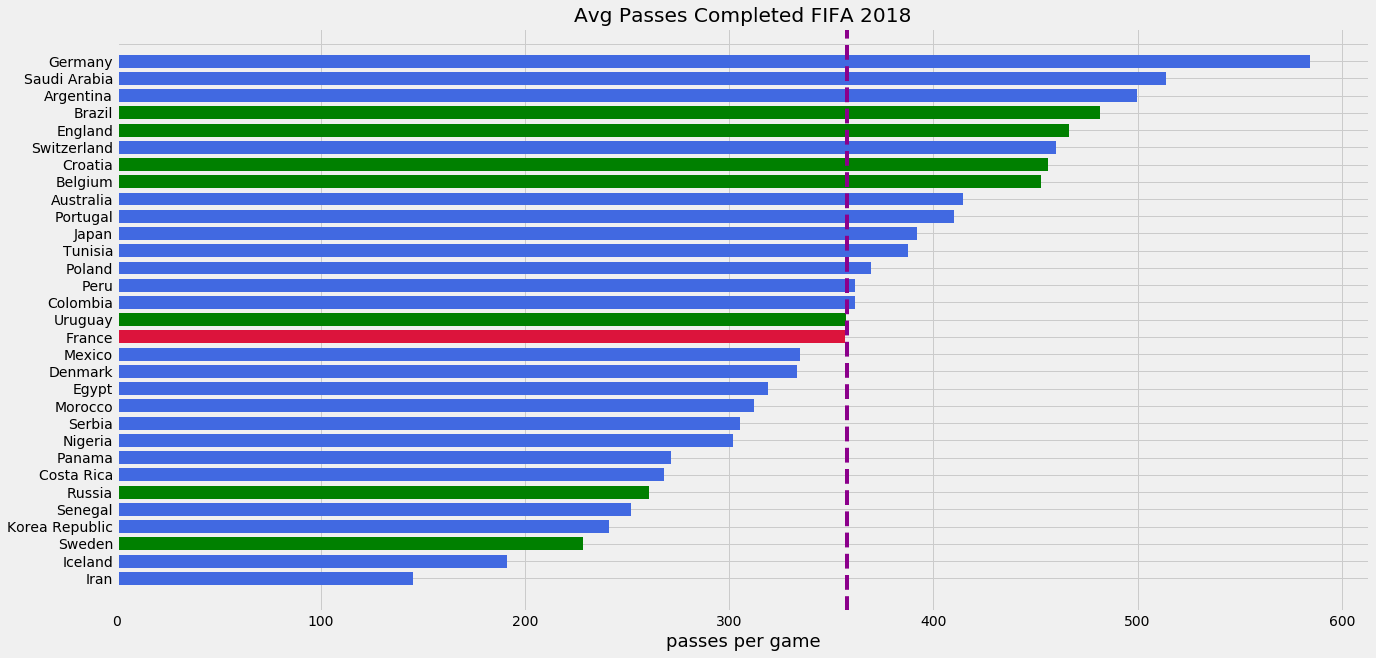

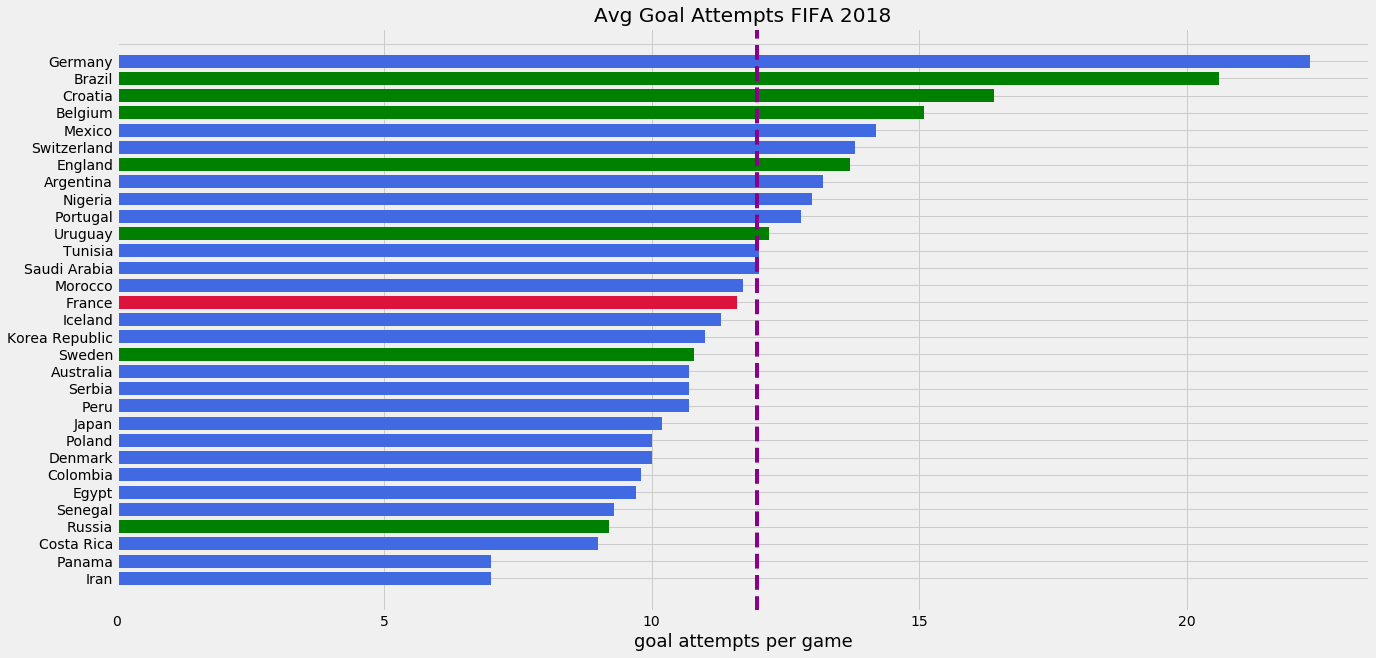

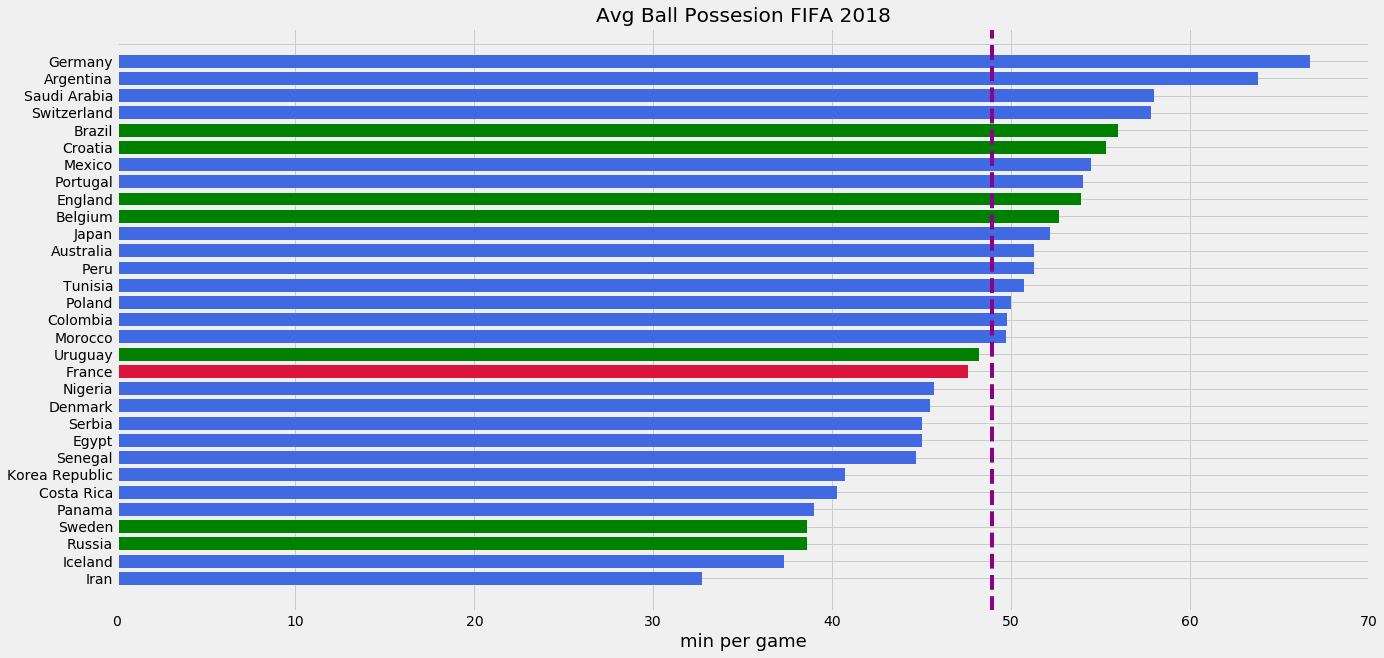

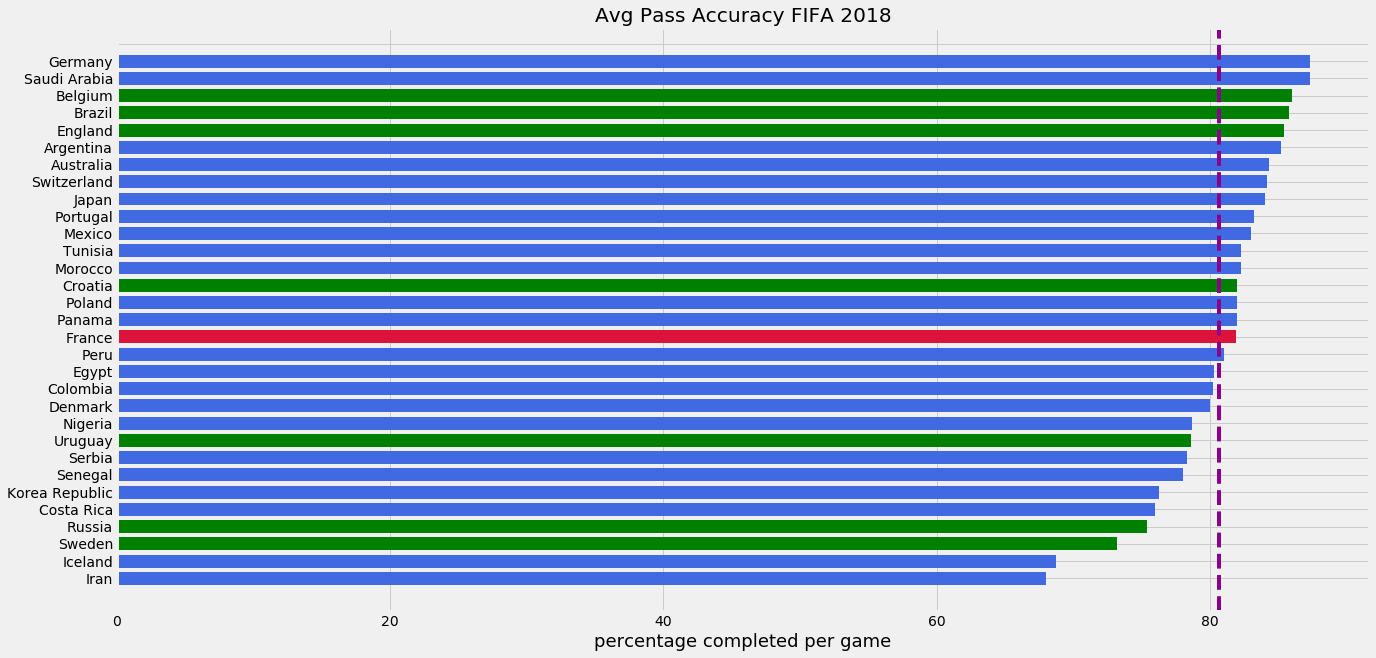

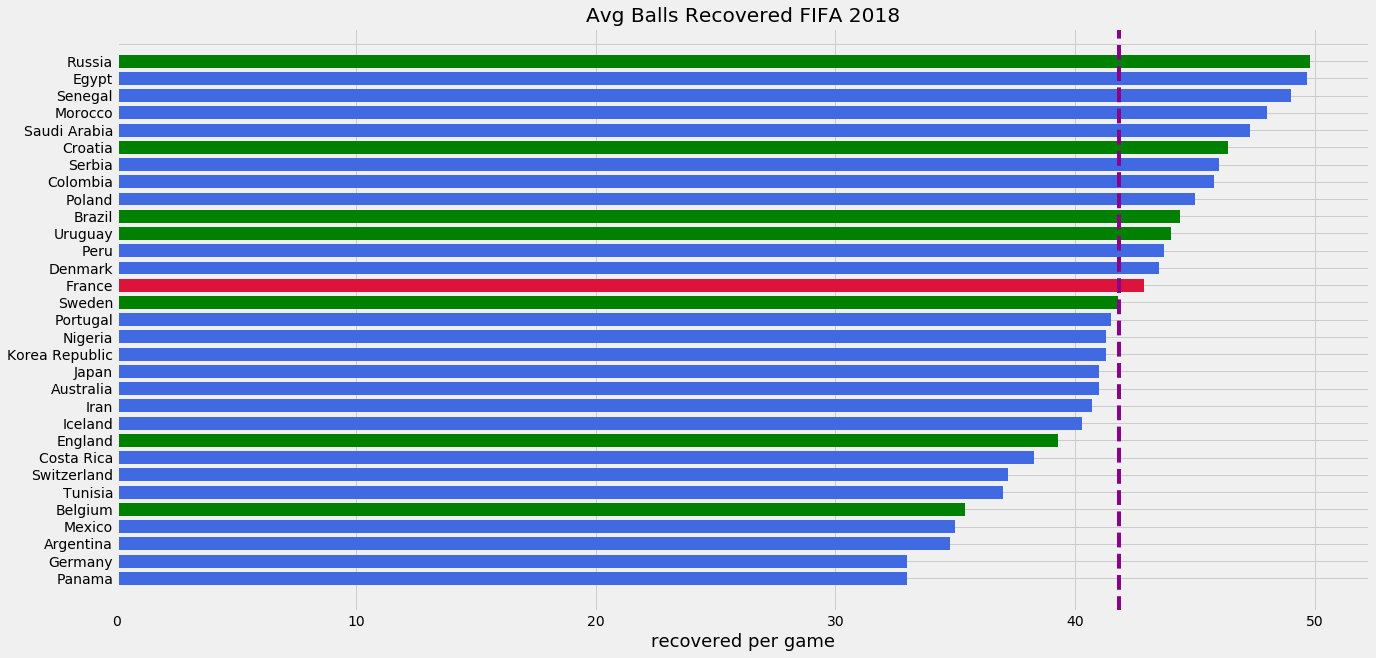

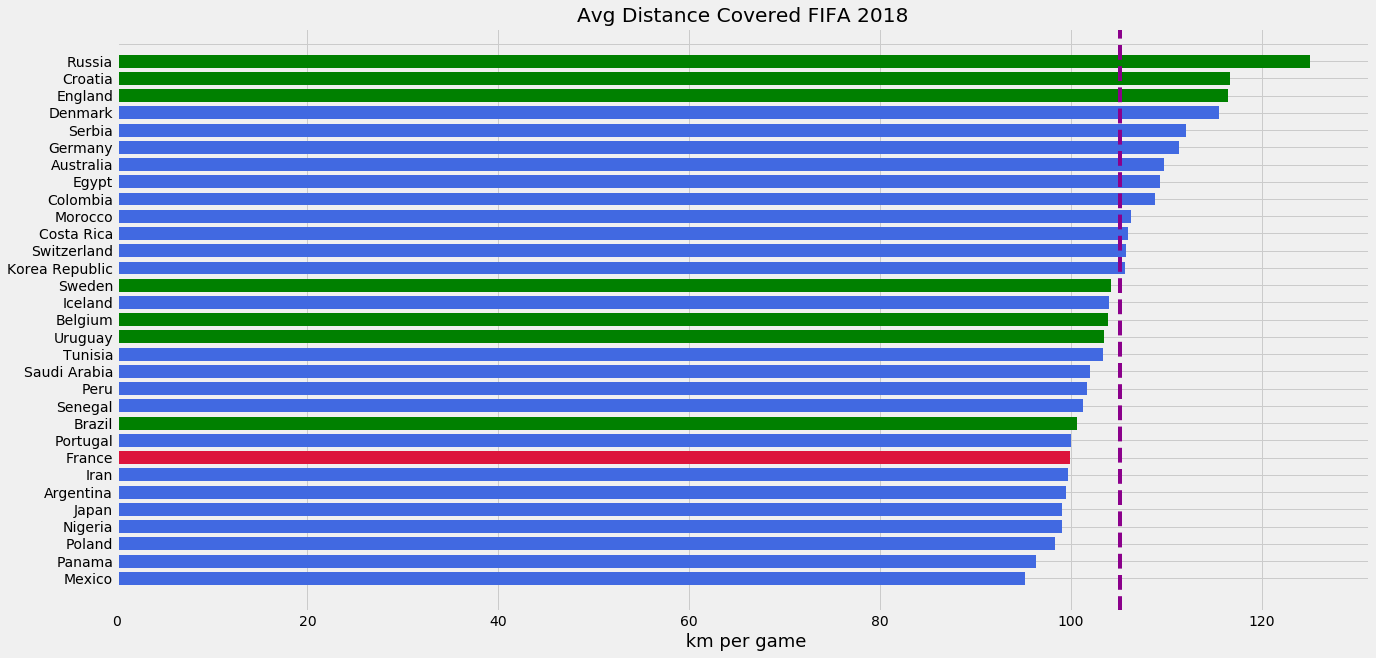

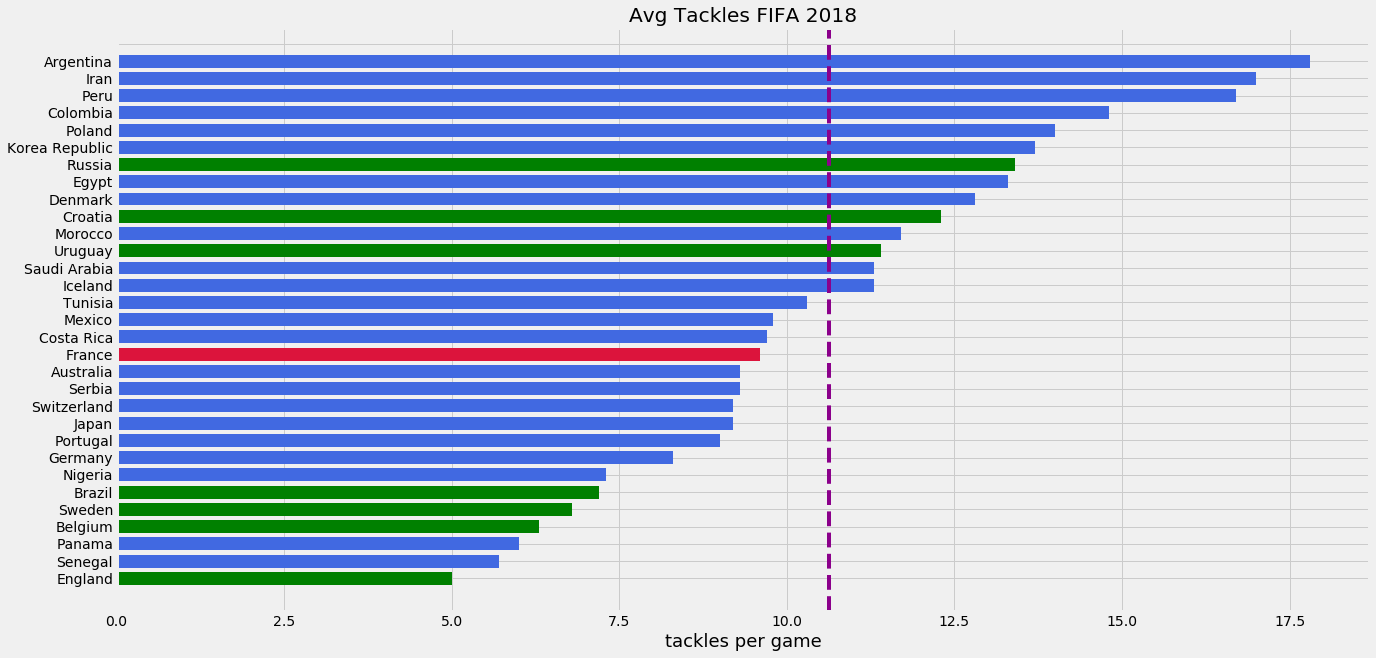

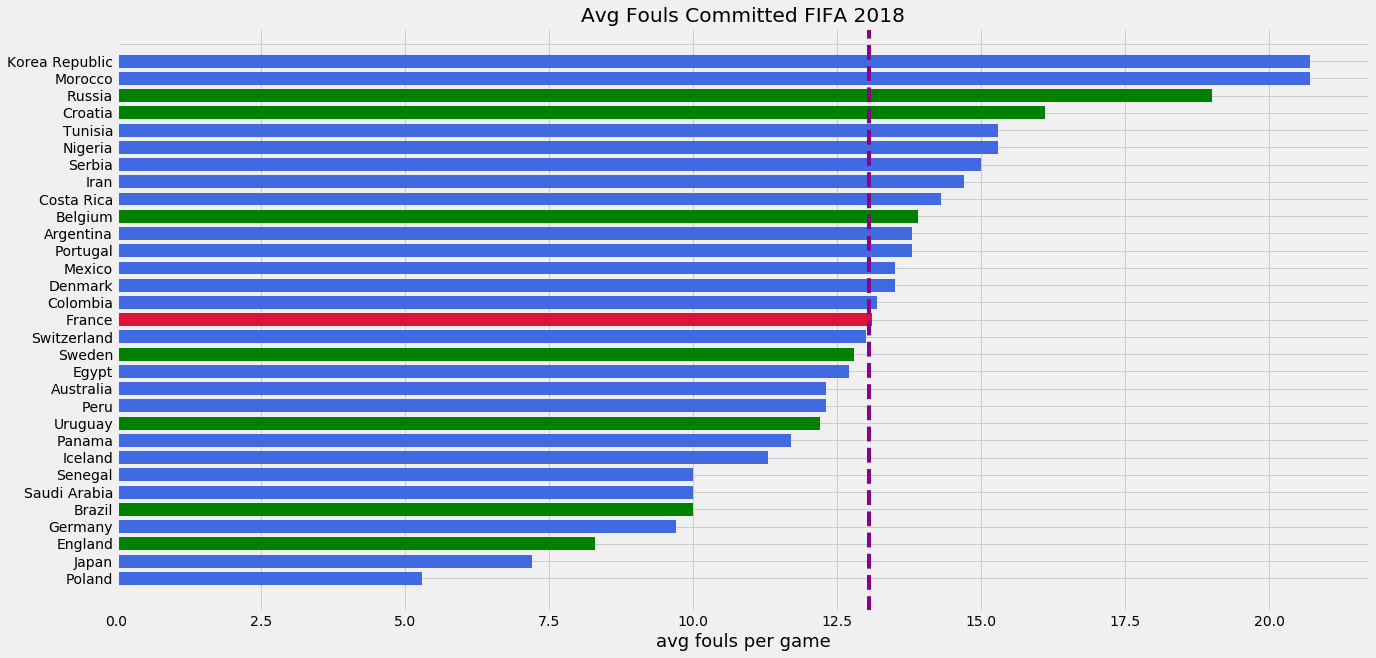

In [36]:
# rename column titles in groups DataFrame
groups.columns = ['Country', 'Passes Completed', 'Goal Attempts', 'Ball Possession', 'Pass Accuracy', 'Balls Recovered',
                  'Distance Covered', 'Tackles','Fouls Committed', 'Number of Games', 'Avg Passes Completed', 'Avg Goal Attempts',
                  'Avg Ball Possesion', 'Avg Pass Accuracy', 'Avg Balls Recovered', 'Avg Distance Covered', 'Avg Tackles', 'Avg Fouls Committed']

# make column list to iterate through in for loop
columnlist = ['Avg Passes Completed', 'Avg Goal Attempts', 'Avg Ball Possesion', 'Avg Pass Accuracy',
              'Avg Balls Recovered', 'Avg Distance Covered', 'Avg Tackles', 'Avg Fouls Committed' ]

# make x axis labels list to iterate through in for loop
x_label_list = ['passes per game', 'goal attempts per game', 'min per game', 'percentage completed per game',
                'recovered per game', ' km per game', 'tackles per game', 'avg fouls per game']

# for loop to create six graphs
for column in columnlist:  
    # plot the average shots per game
    fig, ax = plt.subplots(figsize = (20,10))
    # get plt style
    plt.style.use('fivethirtyeight')
    # set colors for graph
    groups['colors'] = 'royalblue'
    # set France to red and other top 8 to green
    groups.loc[groups["Country"]=="France",'colors'] = 'crimson'
    groups.loc[groups["Country"] == "Russia", 'colors'] = "g"
    groups.loc[groups["Country"] == "Croatia", 'colors'] = "g"
    groups.loc[groups["Country"] == "Uruguay", 'colors'] = "g"
    groups.loc[groups["Country"] == "Sweden", 'colors'] = "g"
    groups.loc[groups["Country"] == "England", 'colors'] = "g"
    groups.loc[groups["Country"] == "Brazil", 'colors'] = "g"
    groups.loc[groups["Country"] == "Belgium", 'colors'] = "g"
    
    # order grpahs by mean
    groups.sort_values(by=column, inplace=True)
    
    # set up graphs
    plt.barh(groups["Country"],
             groups[column],
             align ='center',
             color=groups.colors,
             height = .75)
    
    # set mean vertical line on each graph
    plt.axvline(groups[column].mean(), color='darkmagenta', linestyle='--')

    #set graph titles and x axis labels
    plt.xlabel(x_label_list[columnlist.index(column)], fontsize=18)
    plt.title(f"{column} FIFA 2018", 
              color = "black")

    # set y value ticks
    plt.yticks(np.arange(32),groups["Country"], rotation = 0)
    plt.savefig(f"{column} FIFA 2018.png")

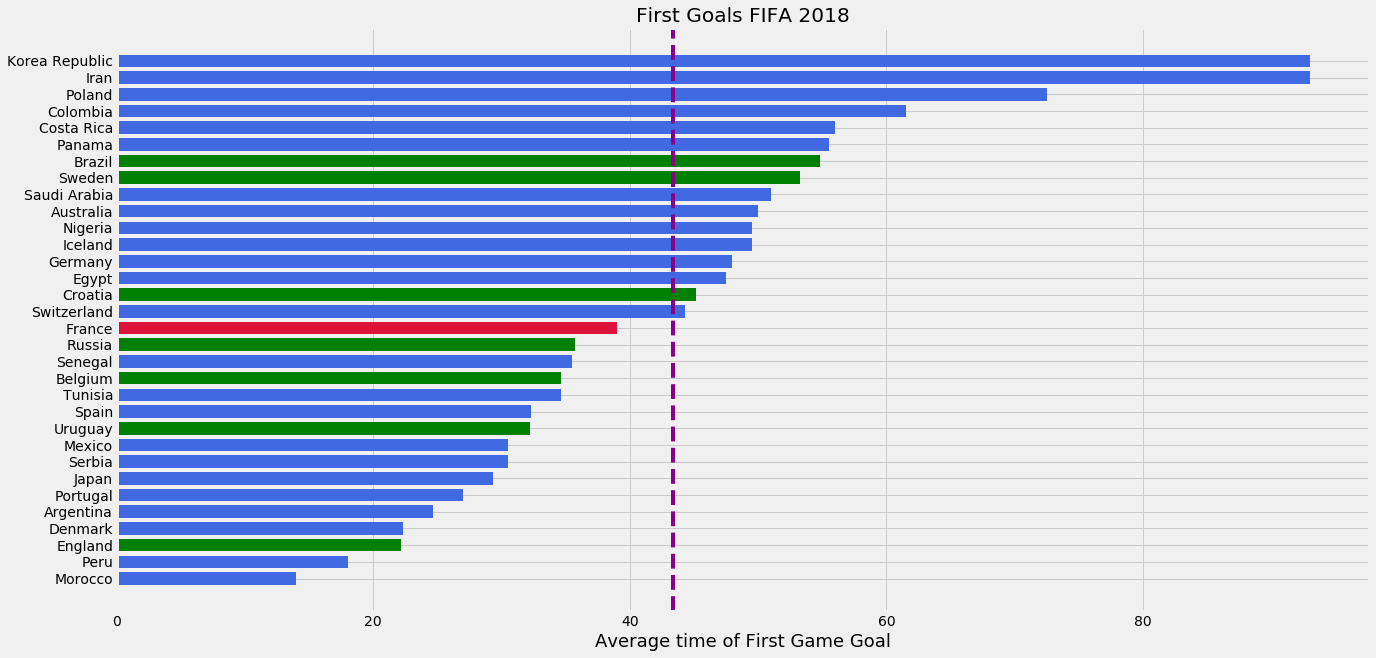

In [37]:

#plot first goal means for each team
fig, ax = plt.subplots(figsize = (20,10))
# get plt style
plt.style.use('fivethirtyeight')
# set colors for graph
goal_means['colors'] = 'royalblue'
# set France to red and other top 8 to green
goal_means.loc[goal_means["Country"]=="France",'colors'] = 'crimson'
goal_means.loc[goal_means["Country"] == "Russia", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Croatia", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Uruguay", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Sweden", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "England", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Brazil", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Belgium", 'colors'] = "g"
    
    # order grpahs by mean
goal_means.sort_values(by='First Goals', inplace=True)
    
    # set up graphs
plt.barh(goal_means["Country"],
        goal_means["First Goals"],
         align ='center',
         color=goal_means.colors,
         height = .75)
    
    # set mean vertical line on each graph
plt.axvline(goal_means["First Goals"].mean(), color='darkmagenta', linestyle='--')

    #set graph titles and x axis labels
plt.xlabel("Average time of First Game Goal", fontsize=18)
plt.title("First Goals FIFA 2018", 
           color = "black")

    # set y value ticks
plt.yticks(np.arange(32),goal_means["Country"], rotation = 0)
plt.savefig(f"First Goals FIFA 2018.png")